## Modelo LSTM

Se procede a realizar los procedimientos necesarios para aplicar el modelo LSTM

In [54]:
## Se importan las librerias necesarias
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import plotly.graph_objs as go

# univariate one step problem with lstm
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
#from keras.preprocessing.sequence import TimeseriesGenerator 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd
import plotly.graph_objects as go

### Carga de los Datos

In [55]:
## Se definen la fecha de inicio y fin de acuerdo con lo establecido en la Evaluación del Modulo Parte 2
start = '2016-05-01'
end = '2018-01-28'

In [56]:
## Se trae la información
META = pdr.get_data_yahoo("META", start, end)['Close']

[*********************100%***********************]  1 of 1 completed


In [57]:
## Se verifican los datos
META.head()

Date
2016-05-02    118.570000
2016-05-03    117.430000
2016-05-04    118.059998
2016-05-05    117.809998
2016-05-06    119.489998
Name: Close, dtype: float64

In [58]:
## Se pasan los datos a un dataframe
dt= pandas.DataFrame(META)
dt.head()

,Close
Date,
2016-05-02,118.570000
2016-05-03,117.430000
2016-05-04,118.059998
2016-05-05,117.809998
2016-05-06,119.489998


In [59]:
## Se verifica la longitud de la serie de datos
len(dt)

439

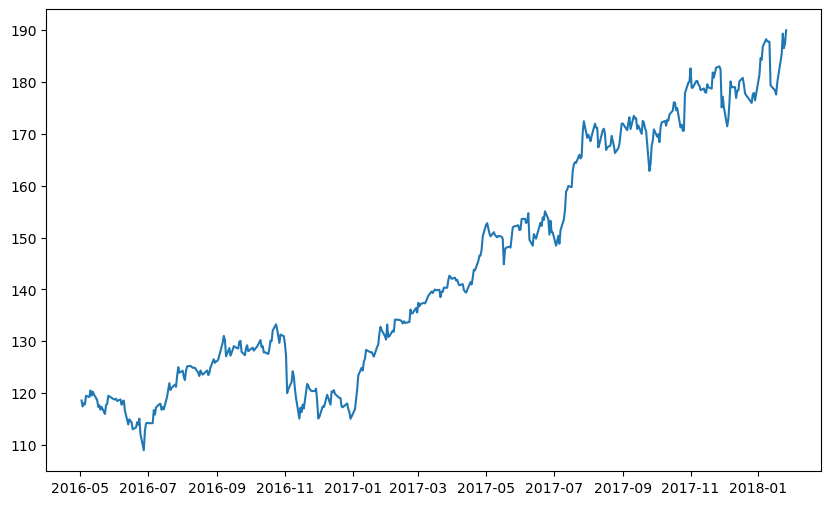

In [60]:
## Se grafica la serie 
#Una vez llamada la librería, graficamos la serie dt.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dt)

### Preprocesamiento de los datos

En acorde con lo aprendido en los tutoriales se procede a procesar los datos para que puedan ser utilziados en LSTM

In [61]:
#Se pasa el data frame a un objeto de tiempo de pandas.
dataindex= pd.to_datetime(dt.index)
dataindex

DatetimeIndex(['2016-05-02', '2016-05-03', '2016-05-04', '2016-05-05',
               '2016-05-06', '2016-05-09', '2016-05-10', '2016-05-11',
               '2016-05-12', '2016-05-13',
               ...
               '2018-01-12', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26'],
              dtype='datetime64[ns]', name='Date', length=439, freq=None)

In [62]:
#Se toma de los precios en cierre un numpy array:
dt2= META.to_numpy()
dt2

array([118.56999969, 117.43000031, 118.05999756, 117.80999756,
       119.48999786, 119.23999786, 120.5       , 119.51999664,
       120.27999878, 119.80999756, 118.66999817, 117.34999847,
       117.65000153, 116.80999756, 117.34999847, 115.97000122,
       117.69999695, 117.88999939, 119.47000122, 119.37999725,
       118.80999756, 118.77999878, 118.93000031, 118.47000122,
       118.79000092, 117.76000214, 118.38999939, 118.55999756,
       116.62000275, 113.94999695, 114.94000244, 114.59999847,
       114.38999939, 113.01999664, 113.37000275, 114.37999725,
       113.91000366, 115.08000183, 112.08000183, 108.97000122,
       112.69999695, 114.16000366, 114.27999878, 114.19000244,
       114.19999695, 116.69999695, 115.84999847, 117.23999786,
       117.87000275, 117.93000031, 116.77999878, 117.29000092,
       116.86000061, 119.37000275, 120.61000061, 121.91999817,
       120.61000061, 121.        , 121.62999725, 121.22000122,
       123.33999634, 125.        , 123.94000244, 124.30

In [63]:
#Se genera un rearreglo de la dimensión del array a 1D, en los renglones
close_data = dt2.reshape((-1,1))
close_data

array([[118.56999969],
       [117.43000031],
       [118.05999756],
       [117.80999756],
       [119.48999786],
       [119.23999786],
       [120.5       ],
       [119.51999664],
       [120.27999878],
       [119.80999756],
       [118.66999817],
       [117.34999847],
       [117.65000153],
       [116.80999756],
       [117.34999847],
       [115.97000122],
       [117.69999695],
       [117.88999939],
       [119.47000122],
       [119.37999725],
       [118.80999756],
       [118.77999878],
       [118.93000031],
       [118.47000122],
       [118.79000092],
       [117.76000214],
       [118.38999939],
       [118.55999756],
       [116.62000275],
       [113.94999695],
       [114.94000244],
       [114.59999847],
       [114.38999939],
       [113.01999664],
       [113.37000275],
       [114.37999725],
       [113.91000366],
       [115.08000183],
       [112.08000183],
       [108.97000122],
       [112.69999695],
       [114.16000366],
       [114.27999878],
       [114

### Partición, Entrenamiento y Prueba

#### Partición

In [64]:
## Se procede a partir los datos
split_percent = 0.95 ## Como se especifico la serie de prueba queda con el 5% de los datos 
split = int(split_percent*len(close_data))

#Aplicamos dicha proporción a la definición de la parte de entrenamiento y de prueba.
close_train = close_data[:split]
close_test = close_data[split:]

date_train = dataindex[:split]
date_test = dataindex[split:]

In [65]:
## Verificación de que las fechas se hayan guardado en el formato correcto
date_test

DatetimeIndex(['2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [66]:
## Se verifica el tamaño de los datos de entrenamiento y prueba
print(len(close_train))
print(len(close_test))

417
22


In [67]:
## Se define la estructura con base en la información brindada en Evaluación del Módulo Parte 2
n_back = 10   #la longitud de ventana 10
train_generator = TimeseriesGenerator(close_train, close_train, length=n_back, batch_size=25)     
#test_generator = TimeseriesGenerator(close_test, close_test, length=n_back, batch_size=1)
test_generator = TimeseriesGenerator(close_test, close_test, length=n_back, batch_size=1, end_index=len(close_test)-1)

In [68]:
# Podemos ver el número de muestras que se prepararán en los datos por el generador para esta serie
print('Samples: %d' % len(train_generator))
print('Samples: %d' % len(test_generator))

Samples: 17
Samples: 12


#### Entrenamiento

In [69]:
#Se configura la red del modelo LSTM
model = Sequential()
model.add(
    LSTM(200,  ## de nodos, dependerá de su poder de cómputo.
        activation='relu', #función de activación.
        input_shape=(n_back,1))   ##la longitud de la secuencia
)
model.add(Dense(1))  #capa de salida de predicción
model.compile(optimizer='adam', loss='mse', metrics= ['mse', 'mae', 'mape'])

num_epochs = 30
model.fit(train_generator, epochs=num_epochs, verbose=0)

In [70]:
## Se reliza el ajuste del modelo a los datos
history = model.fit(train_generator, epochs=num_epochs, verbose=0)

In [71]:
## Se verifica el gráfico de perdida acorde a los epochs
#Imprimimos gráfico de funión de pérdida acorde los epochs
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_data = [
    go.Scatter(
        x=hist['epoch'],
        y=hist['loss'],
        name='loss'
    )
]

plot_layout = go.Layout(
        title='Training loss')
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

#### Prueba

In [72]:
#Predicción en el set de prueba:
prediction = model.predict(test_generator)

#Se pasa el tipo de datos de tensores a datos de una dimensión, se aplica la función reshape.
close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

12/12 [==============================] - 0s 909us/step


In [73]:
prediction

array([182.09909, 183.38013, 184.51906, 185.00534, 185.73688, 185.6554 ,
       185.09909, 183.90211, 183.21417, 182.97488, 182.99202, 183.33124],
      dtype=float32)

In [74]:
#Se hace una gráfica rápida para comparar la realidad con la predicción.
trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Reality'
)
layout = go.Layout(
    title = "META Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [76]:
# Evaluar el modelo en los datos de prueba
mse, _, mae, mape = model.evaluate(test_generator)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

12/12 [==============================] - 0s 1ms/step - loss: 29.5588 - mse: 29.5588 - mae: 5.1693 - mape: 2.8137
Mean Squared Error (MSE): 29.558761596679688
Mean Absolute Error (MAE): 5.1693267822265625
Mean Absolute Percentage Error (MAPE): 2.813737630844116


In [77]:
# Ajustar close_test para que tenga la misma longitud que las predicciones
close_test_recortado = close_test[-len(prediction):]
# Calcula el error cuadrático medio (MSE) manualmente
mse = np.mean((prediction - close_test_recortado)**2)


In [78]:
mse

29.55892105398622

### Pronóstico hacia adelante

Con base en lo aprendido en el tutorial se procede a realizar el pronóstico hacia adelante

In [83]:
## Se identifica el valor de la última posición de la serie
dataindex.max()

Timestamp('2018-01-26 00:00:00')

In [84]:
##Forecasting: Generamos el pronóstico hacia adelante acorde el modelo entrenado, a partir de la última fecha. en este caso generaremos 10 observaciones futuras y finalmente anexaremos las fechas correspondientes.
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-n_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-n_back:]
        x = x.reshape((1, n_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[n_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = dataindex.max()  
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 10
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

1/1 [==============================] - 0s 13ms/step


In [85]:
#Se observan las fechas hacia adelante
forecast_dates

[Timestamp('2018-01-26 00:00:00', freq='D'),
 Timestamp('2018-01-27 00:00:00', freq='D'),
 Timestamp('2018-01-28 00:00:00', freq='D'),
 Timestamp('2018-01-29 00:00:00', freq='D'),
 Timestamp('2018-01-30 00:00:00', freq='D'),
 Timestamp('2018-01-31 00:00:00', freq='D'),
 Timestamp('2018-02-01 00:00:00', freq='D'),
 Timestamp('2018-02-02 00:00:00', freq='D'),
 Timestamp('2018-02-03 00:00:00', freq='D'),
 Timestamp('2018-02-04 00:00:00', freq='D'),
 Timestamp('2018-02-05 00:00:00', freq='D')]

In [86]:
## Se visualiza el pronostico hacia adelante
#Graficamos la serie anterior, aunando el valor del pronóstico.
trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Reality'
)
trace4 = go.Scatter(
    x = forecast_dates,
    y = forecast,
    mode='lines',
    name = 'FWD Forecast'
)

layout = go.Layout(
    title = "META Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()